<a href="https://colab.research.google.com/github/mmubashirm381/House-Price-Prediction/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.special import boxcox1p
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import DataConversionWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('raw_data/train.csv')
test = pd.read_csv('raw_data/test.csv')

In [ ]:
#Data Processing
train = DeletingOutlier_logTrans(train)
n_train = train.shape[0]
#Combine all data
data = pd.concat((train, test)).reset_index(drop=True)

data.drop(['SalePrice'], axis=1, inplace=True)

#Separate train data - x, y
train_y = train.SalePrice

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape))
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

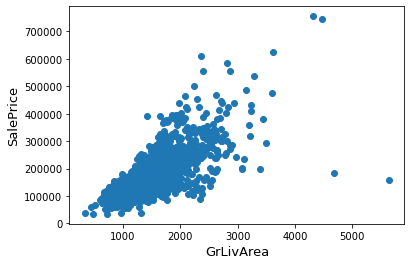

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<AxesSubplot:>

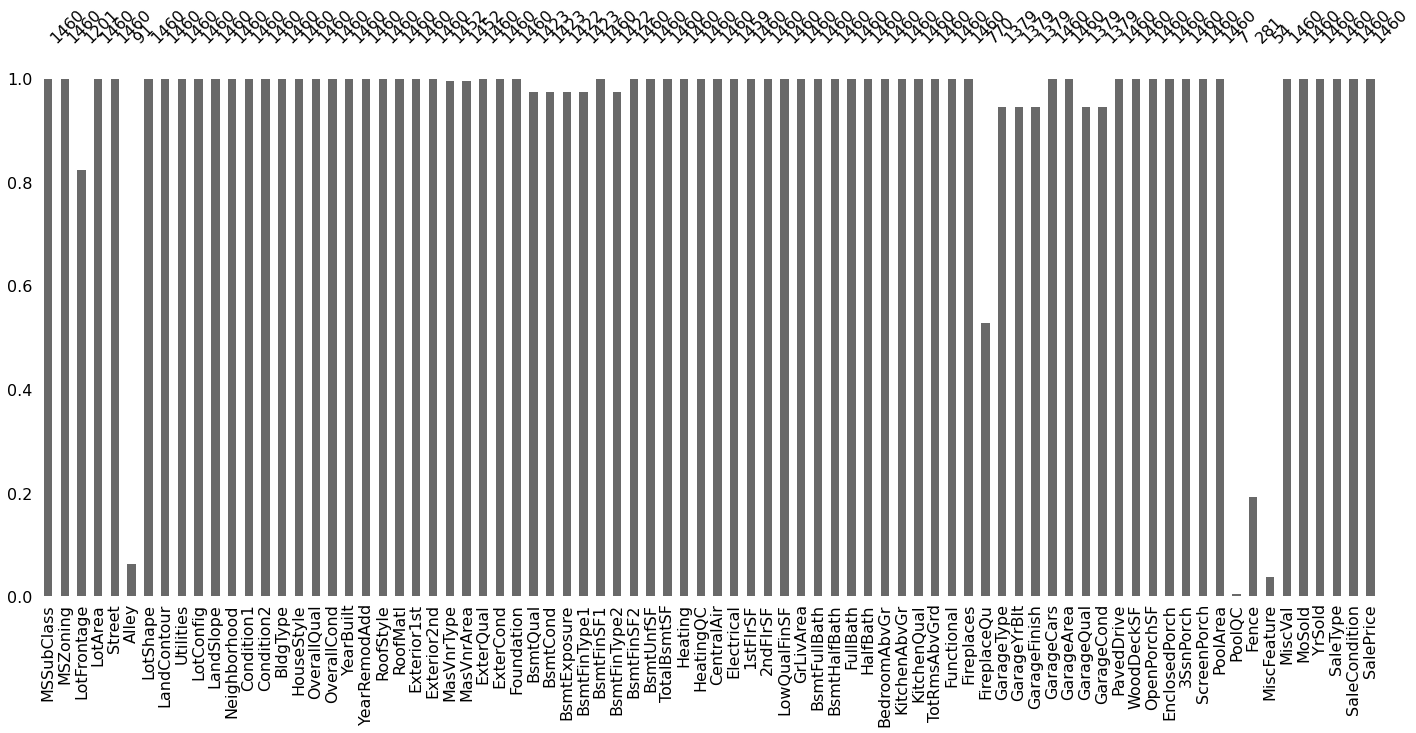

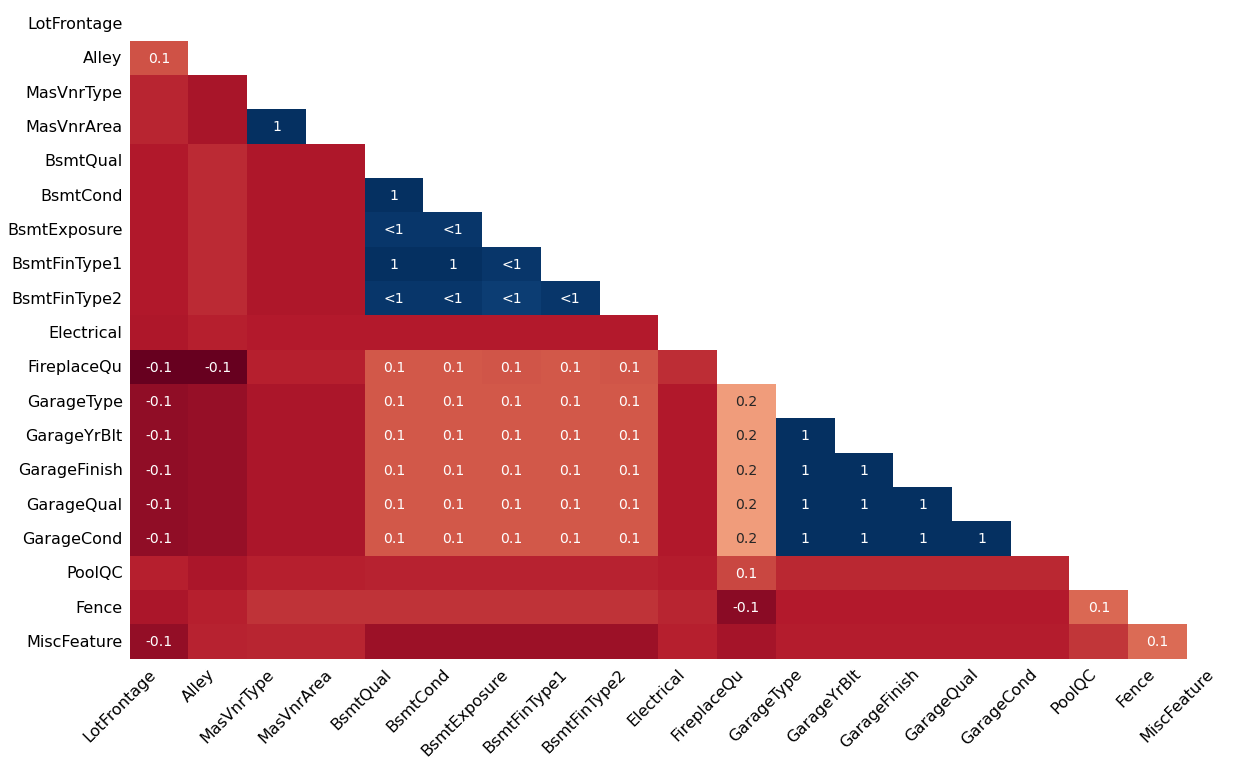

In [ ]:
import missingno as msno
import pandas as pd

# Load data

# Visualize missing data
#msno.matrix(train)
msno.bar(train)
msno.heatmap(train)

In [ ]:
#Data Processing_ deleting outlier and log transformation to the Y
def DeletingOutlier_logTrans(df):
    #Deleting outliers
    df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

    #Log-transformation of the target variable
    df["SalePrice"] = np.log1p(df["SalePrice"])
    return df

In [ ]:
print(train.shape)
DeletingOutlier_logTrans(train).shape

(1460, 80)


(1458, 80)

In [ ]:
#Data Processing
train_ = DeletingOutlier_logTrans(train)

In [ ]:
#Separate train data - x, y
train_x = train_.loc[:, train.columns != 'SalePrice' ]
train_y = train_.SalePrice

In [ ]:
#Feature Engineering _ Dealing with Missing Data

def DealingWithMissingValue(df):

    #PoolQC
    df["PoolQC"] = df["PoolQC"].fillna("None")

    #MiscFeature
    df["MiscFeature"] = df["MiscFeature"].fillna("None")

    #Alley
    df["Alley"] = df["Alley"].fillna("None")

    #Fence
    df["Fence"] = df["Fence"].fillna("None")

    #FireplaceQu
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

    #LotFrontage
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

    #GarageType, GarageFinish, GarageQual and GarageCond
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')

    #GarageYrBlt, GarageArea and GarageCars
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)

    #BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)

    #BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')

    #MasVnrArea and MasVnrType
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

    #MSZoning (The general zoning classification)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

    #Utilities
    df = df.drop(['Utilities'], axis=1)

    #Functional
    df["Functional"] = df["Functional"].fillna("Typ")

    #Electrical
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    #KitchenQual
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

    #Exterior1st and Exterior2nd
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

    #SaleType
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

    #MSSubClass
    df['MSSubClass'] = df['MSSubClass'].fillna("None")

    return df

In [ ]:
def Transformation_Numeric_Categorical(df):

    #MSSubClass=The building class
    df['MSSubClass'] = df['MSSubClass'].apply(str)


    #Changing OverallCond into a categorical variable
    df['OverallCond'] = df['OverallCond'].astype(str)


    #Year and month sold are transformed into categorical features.
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)

    cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

    # process columns, apply LabelEncoder to categorical features
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(list(df[c].values))

    return df

In [ ]:
def GetTotalSqft(df):
    # Adding total sqfootage feature
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    return df

def HandlingSkewed(df):
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    #print("\nSkew in numerical features: \n")
    skewness = pd.DataFrame({'Skew' :skewed_feats})

    skewed_features = skewness.index
    lam = 0.15
    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], lam)

    return df

In [ ]:
train_ = DealingWithMissingValue(train_)
train_ = Transformation_Numeric_Categorical(train_)
train_ = GetTotalSqft(train_)
train_ = HandlingSkewed(train_)
train_ = pd.get_dummies(train_)

In [ ]:
train_.shape
train_.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.750250,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,2.885846,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.750250,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Separate train data - x, y
train_x = train_.loc[:, train_.columns != 'SalePrice' ]
train_y = train_.SalePrice

In [ ]:
#train_.to_csv('processed_data.csv', index = False)

In [ ]:
'''
#train x
train_x = DealingWithMissingValue(train_x)
train_x = Transformation_Numeric_Categorical(train_x)
train_x = GetTotalSqft(train_x)
train_x = HandlingSkewed(train_x)
train_x = pd.get_dummies(train_x)
'''

'\n#train x\ntrain_x = DealingWithMissingValue(train_x)\ntrain_x = Transformation_Numeric_Categorical(train_x)\ntrain_x = GetTotalSqft(train_x)\ntrain_x = HandlingSkewed(train_x)\ntrain_x = pd.get_dummies(train_x)\n'

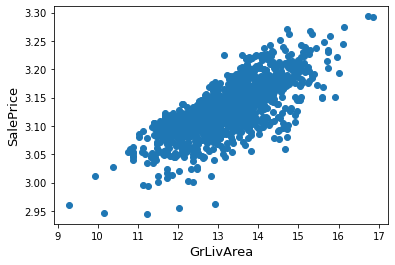

,Missing Ratio


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train_['GrLivArea'], y = train_['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#Check remaining missing values if any other missing values
all_data_na = (train_.isnull().sum() / len(train_)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

In [ ]:
#Feature Engineering
data = DealingWithMissingValue(data)
data = Transformation_Numeric_Categorical(data)
data = GetTotalSqft(data)
data = HandlingSkewed(data)
data = pd.get_dummies(data)

In [ ]:
train_x = data[:n_train]
test_x = data[n_train:]
train_x.to_csv('processed_train_x.csv', index = False)
train_y.to_csv('processed_train_y.csv', index = False)
test_x.to_csv('processed_test_x.csv', index = False)

In [ ]:
#train_x.to_csv('processed_train_x.csv', index = False)

In [ ]:
#train_y.to_csv('processed_train_y.csv', index = False)

In [ ]:
#test x
'''
test_ = DealingWithMissingValue(test)
test_ = Transformation_Numeric_Categorical(test_)
test_ = GetTotalSqft(test_)
test_ = HandlingSkewed(test_)
test_ = pd.get_dummies(test_)
'''

In [ ]:
#test_.to_csv('processed_test_data.csv', index = False)